In [31]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
import time 
import os
import random

# 1, Demonstrate GlobalThreshold Method

In [ ]:
video_path = os.path.join('./saved_results', 'video_Test3.npy')
video = np.load(video_path)

img = video[3].astype('float32')

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


SyntaxError: unexpected EOF while parsing (1859808077.py, line 11)

In [47]:
def draw_contours_matplotlib(image, contours):

    image_with_contours = image.copy() # Create a copy to avoid modifying the original
    num_contours = len(contours)
    if num_contours == 0:
      return image_with_contours

    # Generate a list of distinct colors for each contour
    #colors = plt.cm.viridis(np.linspace(0, 1, num_contours)) # use viridis colormap and generate colors
    #colors = (colors * 255).astype(np.uint8)[:, :3].tolist() # convert to BGR
    colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(num_contours)]
    
    for i, contour in enumerate(contours):
        # Reshape the contour points to (N, 2) for matplotlib plotting
        contour_points = contour.reshape(-1, 2)

        # Draw the contour using matplotlib
        plt.plot(contour_points[:, 0], contour_points[:, 1], color=tuple(c / 255.0 for c in reversed(colors[i])), linewidth=4) # reverse colors to BGR

    # Convert the matplotlib plot back to a numpy array
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

    return image_with_contours

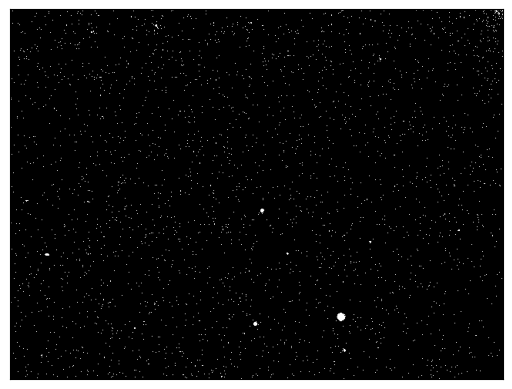

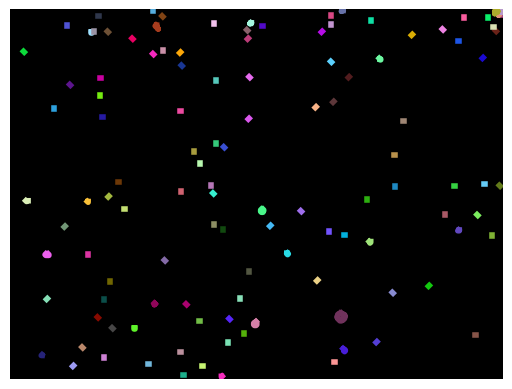

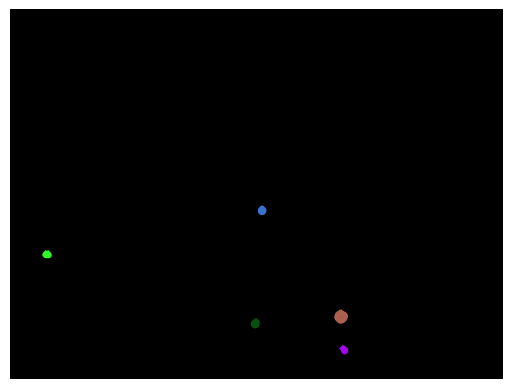

In [48]:

image_input = img 
factor = 2 
pixel_area = 3
detection_limit = np.mean(image_input) + factor * np.std(image_input)  # Liebe adaptive threshold

binary_mask = np.zeros(image_input.shape)


thresh = (image_input > detection_limit)
thresh.dtype = 'uint8'
plt.imshow(thresh, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# find contours: curves joining all continous points along the boundary
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contour 
image_copy = thresh.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)       
# see the results
draw_contours_matplotlib(thresh, contours)

filtered_contours = []
for cnt in contours:
    num_of_pixels = cv2.contourArea(cnt) 
    if num_of_pixels > pixel_area:
        filtered_contours.append(cnt)
draw_contours_matplotlib(thresh, filtered_contours)

# use contours to find coarse centroid
for cnt in contours:
    M = cv2.moments(cnt)
    num_of_pixels = cv2.contourArea(cnt) 
    # https://docs.opencv.org/3.4/d8/d23/classcv_1_1Moments.html
    # M['m00'] = sum of all pixel values within the contour 
    # M['m10'] = sum of coordinates x (column) weighted by pixel value
    # M['m01'] = sum of coordinates y (row) weighted by pixel value
    if num_of_pixels > pixel_area: 
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        binary_mask[int(cy), int(cx)] = 1

